<a href="https://colab.research.google.com/github/FolkGallego/CancerClassification/blob/main/Work_Especialist_Gallego.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importando as librarys necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

In [ ]:
data_path = "https://www.dropbox.com/s/z8nw6pfumdw3bb9/breast-cancer-wisconsin.csv?raw=1" 
dataset = pd.read_csv(data_path)

# eliminar uma coluna com erro
dataset.drop('Unnamed: 32', axis=1, inplace=True)

In [ ]:
#Lendo as 5 primeiras linhas.
dataset.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
#Exibe o número total de linhas e colunas do nosso conjunto de dados
print("Dimensões do Dataset:")
print("Linhas:\t\t{}".format(dataset.shape[0]))
print("Colunas:\t{}".format(dataset.shape[1]))

Dimensões do Dataset:
Linhas:		569
Colunas:	32


In [ ]:
#Descrição estátistica do conjunto de dados
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Atráves da descrição estátistica dos dados podemos visualizar que os dados deverão ser normalizados, pois, algumas features como "smoothness_worst" possuem valores entre 0.07 e 0.22. Enquanto algumas como "area-worst" podem variar de 185 a 4254.

In [ ]:
#Dados ausentes ou nulos em nosso conjunto de dados
dataset.isnull().sum()
dataset.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
#Verificando a quantidade de pessoas com tumores benignos X malignos
dataset["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Diagnósticos:
B    0.627417
M    0.372583
Name: diagnosis, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


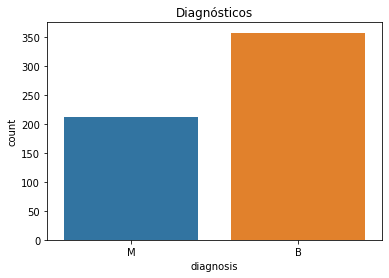

In [ ]:
# ver porcentagem dos diagnósticos
print("Diagnósticos:")
print(dataset.diagnosis.value_counts() / dataset.shape[0])

# plotar o gráfico de barras com os diagnósticos
fig, ax = plt.subplots()
sns.countplot('diagnosis', data=dataset, ax=ax)
ax.set_title("Diagnósticos")
plt.show()

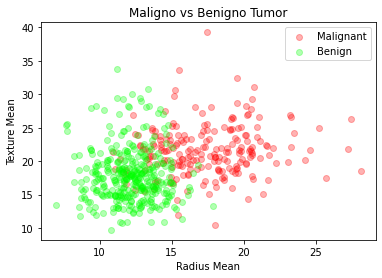

In [ ]:
#Jogando a quantidade de Tumores Malignos e Benignos para minha Váriavel M e B
M = dataset[dataset.diagnosis == "M"]
B = dataset[dataset.diagnosis == "B"]
#Montando o Gráfico para análise descritiva do Dataset
plt.title("Maligno vs Benigno Tumor")
#Vaos levar em consideração as Features Raio Médio e Textura Média
plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")
plt.scatter(M.radius_mean, M.texture_mean, color = "red", label = "Malignant", alpha = 0.3)
plt.scatter(B.radius_mean, B.texture_mean, color = "lime", label = "Benign", alpha = 0.3)
plt.legend()
plt.show()

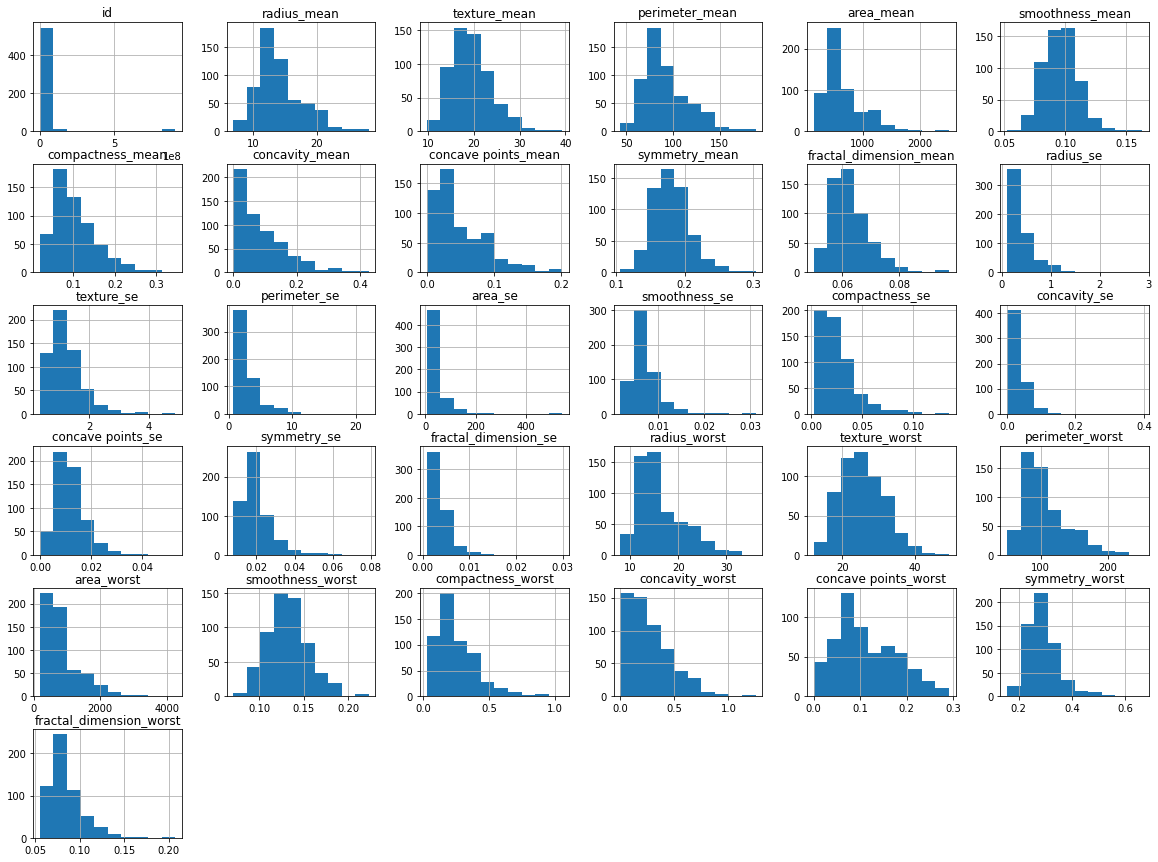

In [ ]:
#Visualizando o conjunto de dados usando Histogramas
#Um Histograma é um gráfico que permite descobrir e mostrar a distribuição de frequência.

import matplotlib.pyplot as plt

num_bins = 10
dataset.hist(bins=num_bins, figsize=(20,15))
plt.show()

In [ ]:
#Aqui vamos fazer a separação das Features com o Target, Features serião as caracteristicas do meu Dataset
#Target seria o Resultado Benigno ou Maligno
X = dataset.iloc[:, 2:32].values
y = dataset.iloc[:, 1].values

#Transformar o Target em valores númericos M=1 / B=0
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

#Divisão do Dataset em um Conjunto de Treino e Teste
from sklearn.model_selection import train_test_split

X_Treino, X_Teste, Y_Treino, Y_Teste = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
print("Dimensão do X para Treino: {}".format(X_Treino.shape))
print("Dimensão do Y para Treino: {}".format(Y_Treino.shape))
print("****************************************")
print("Dimensão do X para Teste: {}".format(X_Teste.shape))
print("Dimensão do Y para Teste: {}".format(Y_Teste.shape))

Dimensão do X para Treino: (426, 30)
Dimensão do Y para Treino: (426,)
****************************************
Dimensão do X para Teste: (143, 30)
Dimensão do Y para Teste: (143,)


In [ ]:
#Agora vamos visualizar Brevemente os Dados de X para Treino e Teste antes de realizarmos a padronização dos mesmos
print(X_Treino[0][:])
print("***************************************************************************************")
print(X_Teste[0][:])

[1.185e+01 1.746e+01 7.554e+01 4.327e+02 8.372e-02 5.642e-02 2.688e-02
 2.280e-02 1.875e-01 5.715e-02 2.070e-01 1.238e+00 1.234e+00 1.388e+01
 7.595e-03 1.500e-02 1.412e-02 8.578e-03 1.792e-02 1.784e-03 1.306e+01
 2.575e+01 8.435e+01 5.178e+02 1.369e-01 1.758e-01 1.316e-01 9.140e-02
 3.101e-01 7.007e-02]
***************************************************************************************
[1.340e+01 2.052e+01 8.864e+01 5.567e+02 1.106e-01 1.469e-01 1.445e-01
 8.172e-02 2.116e-01 7.325e-02 3.906e-01 9.306e-01 3.093e+00 3.367e+01
 5.414e-03 2.265e-02 3.452e-02 1.334e-02 1.705e-02 4.005e-03 1.641e+01
 2.966e+01 1.133e+02 8.444e+02 1.574e-01 3.856e-01 5.106e-01 2.051e-01
 3.585e-01 1.109e-01]


In [ ]:
#Realizando a Padronização do Dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_Treino = sc.fit_transform(X_Treino)
X_Teste = sc.transform(X_Teste)

In [ ]:
#Agora vamos visualizar Brevemente os Dados de X para Treino e Teste DEPOIS de realizarmos a padronização dos mesmos
print(X_Treino[0][:])
print("***************************************************************************************")
print(X_Teste[0][:])

[-0.65079907 -0.43057322 -0.68024847 -0.62698309 -0.91381897 -0.93335153
 -0.78763077 -0.67944444  0.25404078 -0.79877182 -0.68958948  0.04723809
 -0.78036299 -0.55337361  0.21546423 -0.59450332 -0.55964264 -0.52889336
 -0.30718648 -0.73414209 -0.6661438   0.01849243 -0.68117939 -0.63150142
  0.19196229 -0.50775064 -0.69592933 -0.36433881  0.32349851 -0.7578486 ]
***************************************************************************************
[-0.21395901  0.3125461  -0.14355187 -0.28254034  1.0285724   0.85395767
  0.71214153  0.84017194  1.12533599  1.55356719 -0.04948946 -0.5161856
  0.1223834  -0.14498321 -0.55702826 -0.14322791  0.08979712  0.27743345
 -0.41337566  0.11123962  0.01905951  0.66396802  0.17216914 -0.07384415
  1.08702447  0.87505243  1.21700274  1.37043754  1.08911166  1.53928319]


# Iniciando a classificação do dataset com diferentes modelos classificadores.
Classificadores utilizados:
*   Logistic Regression
*   KNN
*   Support Vector Machines
*   Kernel SVM
*   Naïve Bayes (Gaussian)
*   Decision Tree Algorithm
*   Random Forest Classification

In [ ]:
#Usando Algoritmo de Regressão Logística para o Dataset de Treinamento
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)

#Classificando os dados
classifier.fit(X_Treino, Y_Treino)

#Realizando testes com o dataset de teste
Y_pred_logistRegression = classifier.predict(X_Teste)

#Imprimindo o retorno
Y_pred_logistRegression

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1])

In [ ]:
#Usando KNN Método da classe de vizinhos para usar o algoritmo do vizinho mais próximo
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

#Classificando os dados
classifier.fit(X_Treino, Y_Treino)

#Realizando testes com o dataset de teste
Y_pred_knn = classifier.predict(X_Teste)

#Imprimindo o retorno
Y_pred_knn

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1])

In [ ]:
#Usando o método SVC da classe svm para usar o algoritmo Support Vector Machine
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)

#Classificando os dados
classifier.fit(X_Treino, Y_Treino)

#Realizando testes com o dataset de teste
Y_pred_svmLinear = classifier.predict(X_Teste)

#Imprimindo o retorno
Y_pred_svmLinear

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1])

In [ ]:
#Usando o método SVC da classe svm para usar o algoritmo Kernel SVM
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)

#Classificando os dados
classifier.fit(X_Treino, Y_Treino)

#Realizando testes com o dataset de teste
Y_pred_svmRBF = classifier.predict(X_Teste)

#Imprimindo o retorno
Y_pred_svmRBF

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1])

In [ ]:
#Usando o método GaussianNB - Naive-Bayes(Gaussian)
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

#Classificando os dados
classifier.fit(X_Treino, Y_Treino)

#Realizando testes com o dataset de teste
Y_pred_Gaussian = classifier.predict(X_Teste)

#Imprimindo o retorno
Y_pred_Gaussian

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1])

In [ ]:
#Usando DecisionTreeClassifier - Algoritimo de Árvore de Decisão
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

#Classificando os dados
classifier.fit(X_Treino, Y_Treino)

#Realizando testes com o dataset de teste
Y_pred_DecisionTree = classifier.predict(X_Teste)

#Imprimindo o retorno
Y_pred_DecisionTree

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1])

In [ ]:
#Usando o método RandomForestClassifier da classe ensemble para usar o algoritmo Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

#Classificando os dados
classifier.fit(X_Treino, Y_Treino)

#Realizando testes com o dataset de teste
Y_pred_RandomForest = classifier.predict(X_Teste)

#Imprimindo o retorno
Y_pred_RandomForest

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1])

# Avaliação dos Modelos atráves da Acurácia e outras métricas que medem precisão e desempenho

In [ ]:
#Importando confusion_matrix de sklearn
from sklearn.metrics import confusion_matrix

#Gerando a matriz de confusão para cada modelo classificador

#Regressão Logística
cm_logistic = confusion_matrix(Y_Teste, Y_pred_logistRegression)

#KNN
cm_knn = confusion_matrix(Y_Teste, Y_pred_knn)

#SVM Linear
cm_svmlinear = confusion_matrix(Y_Teste, Y_pred_svmLinear)

#SVM RBF
cm_svmrbf = confusion_matrix(Y_Teste, Y_pred_svmRBF)

#Gaussian
cm_gaussian = confusion_matrix(Y_Teste, Y_pred_Gaussian)

#Decision Tree
cm_decisiontree = confusion_matrix(Y_Teste, Y_pred_DecisionTree)

#Random Forest
cm_randomforest = confusion_matrix(Y_Teste, Y_pred_RandomForest)

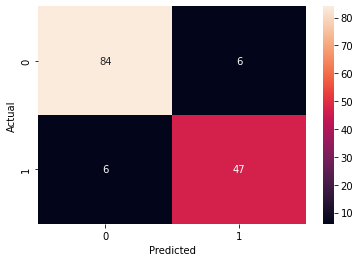

In [ ]:
#Visualizando a matriz de confusão Visual do Modelo Gaussiano
confusion_matrix = pd.crosstab(Y_Teste, Y_pred_Gaussian, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

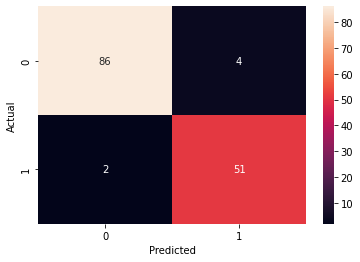

In [ ]:
#Visualizando a matriz de confusão Visual do Modelo Decision Tree
confusion_matrix = pd.crosstab(Y_Teste, Y_pred_DecisionTree, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [ ]:
#Imrpimindo a Matriz de Confusão
print("Naive Bayes (Gaussian)")
print(cm_gaussian)
print("*********************************")
print("Decision Tree - Modelo de decisão em árvores")
print(cm_decisiontree)

Naive Bayes (Gaussian)
[[84  6]
 [ 6 47]]
*********************************
Decision Tree - Modelo de decisão em árvores
[[86  4]
 [ 2 51]]


In [ ]:
#Importando Métrica de Acurácia
from sklearn.metrics import accuracy_score

print("Acurácia - Regressão Logística : {}".format(accuracy_score(Y_Teste, Y_pred_logistRegression) * 100))
print("Acurácia - KNN : {}".format(accuracy_score(Y_Teste, Y_pred_knn) * 100))
print("Acurácia - SVM Linear : {}".format(accuracy_score(Y_Teste, Y_pred_svmLinear) * 100))
print("Acurácia - SVM Rbf : {}".format(accuracy_score(Y_Teste, Y_pred_svmRBF) * 100))
print("Acurácia - Naive Bayes(Gaussian) : {}".format(accuracy_score(Y_Teste, Y_pred_Gaussian) * 100))
print("Acurácia - Decision Tree : {}".format(accuracy_score(Y_Teste, Y_pred_DecisionTree) * 100))
print("Acurácia - Random Forest : {}".format(accuracy_score(Y_Teste, Y_pred_RandomForest) * 100))

Acurácia - Regressão Logística : 95.8041958041958
Acurácia - KNN : 95.1048951048951
Acurácia - SVM Linear : 97.2027972027972
Acurácia - SVM Rbf : 96.5034965034965
Acurácia - Naive Bayes(Gaussian) : 91.6083916083916
Acurácia - Decision Tree : 95.8041958041958
Acurácia - Random Forest : 98.6013986013986


In [ ]:
print("Acurácia - Naive Bayes(Gaussian) : {}".format(accuracy_score(Y_Teste, Y_pred_Gaussian) * 100))
print("Acurácia - Decision Tree : {}".format(accuracy_score(Y_Teste, Y_pred_DecisionTree) * 100))
print("***********************************************************")
print("Precisão - Naive Bayes(Gaussian) : {}".format(precision_score(Y_Teste, Y_pred_Gaussian) * 100))
print("Precisão - Decision Tree : {}".format(precision_score(Y_Teste, Y_pred_DecisionTree) * 100))

Acurácia - Naive Bayes(Gaussian) : 91.6083916083916
Acurácia - Decision Tree : 95.8041958041958
***********************************************************
Precisão - Naive Bayes(Gaussian) : 88.67924528301887
Precisão - Decision Tree : 92.72727272727272


In [ ]:
#Importando Métrica Precisão
from sklearn.metrics import precision_score

print("Precisão - Regressão Logística : {}".format(precision_score(Y_Teste, Y_pred_logistRegression) * 100))
print("Precisão - KNN : {}".format(precision_score(Y_Teste, Y_pred_knn) * 100))
print("Precisão - SVM Linear : {}".format(precision_score(Y_Teste, Y_pred_svmLinear) * 100))
print("Precisão - SVM Rbf : {}".format(precision_score(Y_Teste, Y_pred_svmRBF) * 100))
print("Precisão - Naive Bayes(Gaussian) : {}".format(precision_score(Y_Teste, Y_pred_Gaussian) * 100))
print("Precisão - Decision Tree : {}".format(precision_score(Y_Teste, Y_pred_DecisionTree) * 100))
print("Precisão - Random Forest : {}".format(precision_score(Y_Teste, Y_pred_RandomForest) * 100))

Precisão - Regressão Logística : 94.33962264150944
Precisão - KNN : 97.91666666666666
Precisão - SVM Linear : 96.22641509433963
Precisão - SVM Rbf : 96.15384615384616
Precisão - Naive Bayes(Gaussian) : 88.67924528301887
Precisão - Decision Tree : 92.72727272727272
Precisão - Random Forest : 98.11320754716981


In [ ]:
#Importando Métrica de Recall
from sklearn.metrics import recall_score

print("Recall - Regressão Logística : {}".format(recall_score(Y_Teste, Y_pred_logistRegression) * 100))
print("Recall - KNN : {}".format(recall_score(Y_Teste, Y_pred_knn) * 100))
print("Recall - SVM Linear : {}".format(recall_score(Y_Teste, Y_pred_svmLinear) * 100))
print("Recall - SVM Rbf : {}".format(recall_score(Y_Teste, Y_pred_svmRBF) * 100))
print("Recall - Naive Bayes(Gaussian) : {}".format(recall_score(Y_Teste, Y_pred_Gaussian) * 100))
print("Recall - Decision Tree : {}".format(recall_score(Y_Teste, Y_pred_DecisionTree) * 100))
print("Recall - Random Forest : {}".format(recall_score(Y_Teste, Y_pred_RandomForest) * 100))

Recall - Regressão Logística : 94.33962264150944
Recall - KNN : 88.67924528301887
Recall - SVM Linear : 96.22641509433963
Recall - SVM Rbf : 94.33962264150944
Recall - Naive Bayes(Gaussian) : 88.67924528301887
Recall - Decision Tree : 96.22641509433963
Recall - Random Forest : 98.11320754716981
